In [48]:
#for better organization we have users import all modules that will be needed throughout the code 
import os

#This library allows to read and format Excel files
#Import RNAseqdata in excel format 
import xlrd 

#This library provides with multiple operations and data analysis 
#import working data which contains CALR vs. CALR mutant RNA seq. results and the lists of genes associated with the unfolded protein response (UPR) and Glycolysis (Gly) pathways obtained from Reactome database
import pandas as pd

#This method allows to export dataframe objects into excel files
#Write in excel the matching outcomes for upregulated and downregulated genes
from pandas import ExcelWriter

#This library allows to generate plots and other visualization graphs
#Plot downregulated and upregulated genes + matching genes
import matplotlib.pyplot as plt 

#This library provides with high-level mathematical functions and also provides with graphic functions
#Used along with matplot to generate graphs of upregulated and downregulated genes 
import numpy as np 

#This function allows to define and format ticks, and set scale
import matplotlib.ticker as ticker

#This function supplies a string that can be formatted using the format method and also provides a cleaner visualization of the axis values 
from matplotlib.ticker import StrMethodFormatter

#This function allows to display representation of graphs in the format of HTML
from IPython.display import HTML

In [49]:
#set working directory and upload your data excel sheet of interest
cwd = os.getcwd()
os.chdir('/Users/user/desktop')
#User defines file name userinput = ("enter file name needed to read")
userinput = ("RNAseqdata.xls")
myfile = open(userinput)
xl = pd.ExcelFile(userinput)
#User selects threshold for significant upregulated and downregulated genes
Threshold_Upregulated = 20
Threshold_Downregulated = -20

In [50]:
cols = ['NAME', 'SCORE']
df = xl.parse("RNAseq")
df.drop('DESCRIPTION', axis =1, inplace = True)
df.drop('GENE_SYMBOL', axis =1, inplace = True)
df.drop('GENE_TITLE', axis =1, inplace = True)
df

,NAME,SCORE
0,CD53,31.086206
1,PIM2,30.288067
2,NSF,29.087437
3,PSAT1,28.312407
4,MTHFD2,26.850730
...,...,...
16097,F10,-34.502815
16098,PIK3C2G,-34.909992
16099,D930015E06RIK,-38.306778
16100,PLAC8,-39.212330


In [51]:
#sort CALR vs. CALR mutant RNA Seq. genes by the given expression score from lowest to highest
df = df.sort_values(by=['SCORE'])
df

,NAME,SCORE
16101,NEAT1,-44.626900
16100,PLAC8,-39.212330
16099,D930015E06RIK,-38.306778
16098,PIK3C2G,-34.909992
16097,F10,-34.502815
...,...,...
4,MTHFD2,26.850730
3,PSAT1,28.312407
2,NSF,29.087437
1,PIM2,30.288067


In [52]:
cols = ['NAME', 'SCORE']
df = xl.parse("RNAseq")
df.drop('DESCRIPTION', axis =1, inplace = True)
df.drop('GENE_SYMBOL', axis =1, inplace = True)
df.drop('GENE_TITLE', axis =1, inplace = True)
df

,NAME,SCORE
0,CD53,31.086206
1,PIM2,30.288067
2,NSF,29.087437
3,PSAT1,28.312407
4,MTHFD2,26.850730
...,...,...
16097,F10,-34.502815
16098,PIK3C2G,-34.909992
16099,D930015E06RIK,-38.306778
16100,PLAC8,-39.212330


In [53]:
#sort CALR vs. CALR mutant RNA Seq. genes by the given expression score from lowest to highest
df = df.sort_values(by=['SCORE'])
df

,NAME,SCORE
16101,NEAT1,-44.626900
16100,PLAC8,-39.212330
16099,D930015E06RIK,-38.306778
16098,PIK3C2G,-34.909992
16097,F10,-34.502815
...,...,...
4,MTHFD2,26.850730
3,PSAT1,28.312407
2,NSF,29.087437
1,PIM2,30.288067


In [54]:
#set threshold and define range of genes thought to be significantly upregulated based on threshold (threshold value can be set based on the literature, in this case we use 20 as an arbitrary value)
#Anything above score 10 is considered significantly upregulated 
#Define upregulated genes data frame
df_Upregulated = df[df['SCORE'] >= Threshold_Upregulated] 
#list of significantly upregulated genes
print (df_Upregulated [['NAME', 'SCORE']])

       NAME      SCORE
33    AURKB  20.026142
32     PGK1  20.258944
31     RRM2  20.429453
30     NEK6  20.467995
29     VARS  20.484602
28    DUSP4  20.577526
27     PLK1  21.026636
26     MTAP  21.256956
25  SLC25A5  21.341026
24    PHGDH  21.443819
23    HMGB2  21.547625
22      MIF  21.572990
21   SLC7A1  21.645197
20     NARS  22.112090
19    PGAM1  22.408010
18     LDHA  22.457441
17    KPNA2  22.539230
16   SLC7A5  22.619701
15      PKM  22.771986
14     DMPK  23.008417
13     GPT2  23.089270
12     AHCY  23.222986
11    SHMT2  24.443190
10     TFRC  25.121916
9      ASNS  25.177706
8     TUBA8  25.233074
7      PIM1  25.280376
6     LRP12  26.639702
5      SELL  26.674711
4    MTHFD2  26.850730
3     PSAT1  28.312407
2       NSF  29.087437
1      PIM2  30.288067
0      CD53  31.086206


Text(0.5, 1, 'CALR Mutant vs. CALR WT RNAseq Significantly Upregulated Genes')

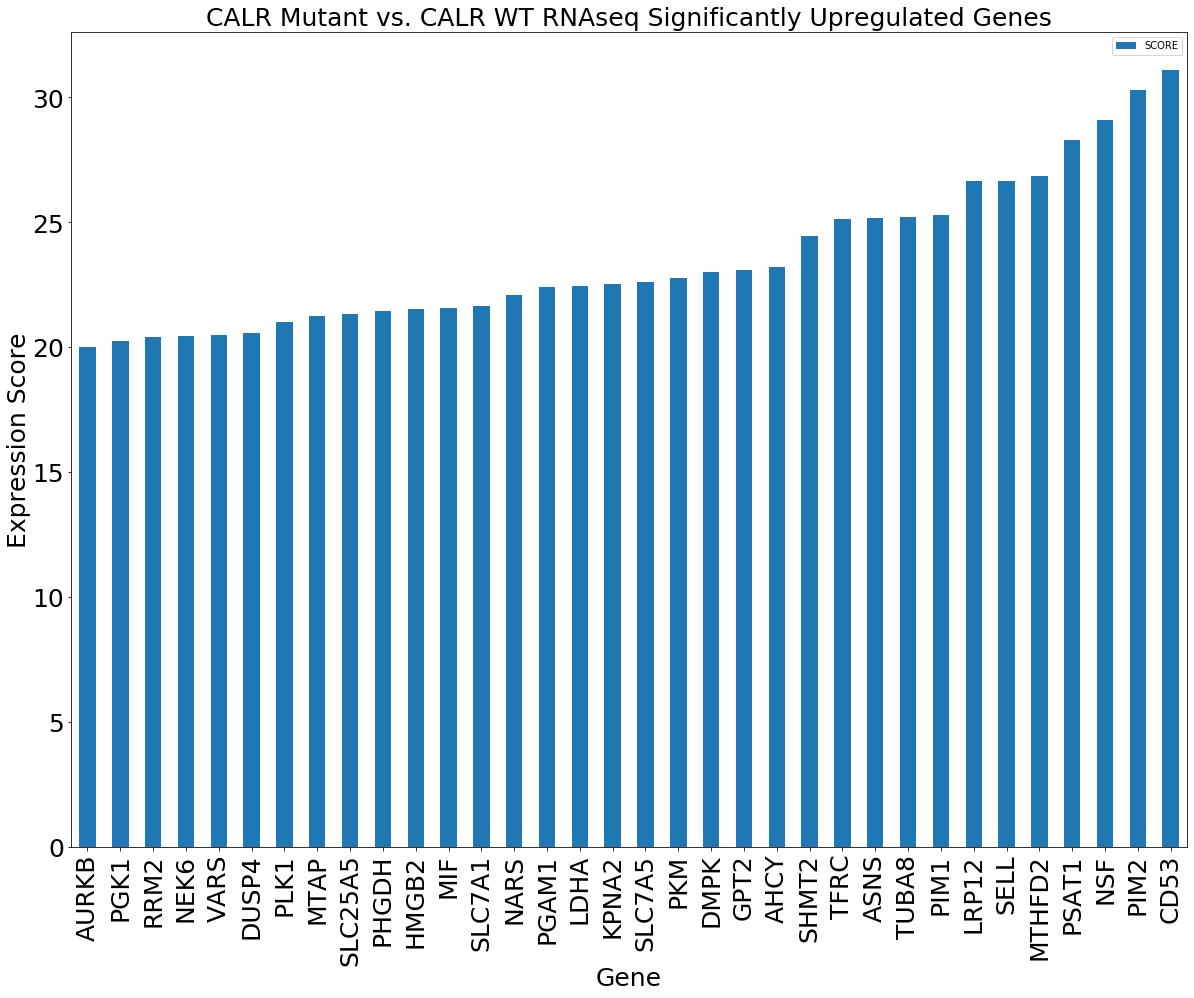

In [55]:
#Graphing of the significantly upregulated genes, this gives the user the ability to visualize the general trend of the results
#Graph significantly upregulated genes 
df_Upregulated.plot(x='NAME', y='SCORE', kind= 'bar', figsize=(20,15), fontsize =25)
plt.xlabel("Gene", labelpad=1, fontsize =25)
plt.ylabel("Expression Score", labelpad=1, fontsize =25)
plt.title("CALR Mutant vs. CALR WT RNAseq Significantly Upregulated Genes", y=1, fontsize =25)

In [56]:
#set threshold and define range of genes thought to be significantly downregulated based on threshold (threshold value can be set based on the literature, in this case we use -20 as an arbitrary value)
#Anything above score -5 is considered significantly downregulated 
#define downregulated genes dataframe
df_downregulated = df[df['SCORE'] <= Threshold_Downregulated] 

In [57]:
#list significantly downregulated genes based on threshold 
print (df_downregulated [['NAME', 'SCORE']])

                NAME      SCORE
16101          NEAT1 -44.626900
16100          PLAC8 -39.212330
16099  D930015E06RIK -38.306778
16098        PIK3C2G -34.909992
16097            F10 -34.502815
...              ...        ...
16039           SAT1 -20.169857
16038         SFRS18 -20.129152
16037          ACSS2 -20.075260
16036         RNASEL -20.053108
16035       KCNQ1OT1 -20.033846

[67 rows x 2 columns]


Text(0.5, 0, 'Gene')

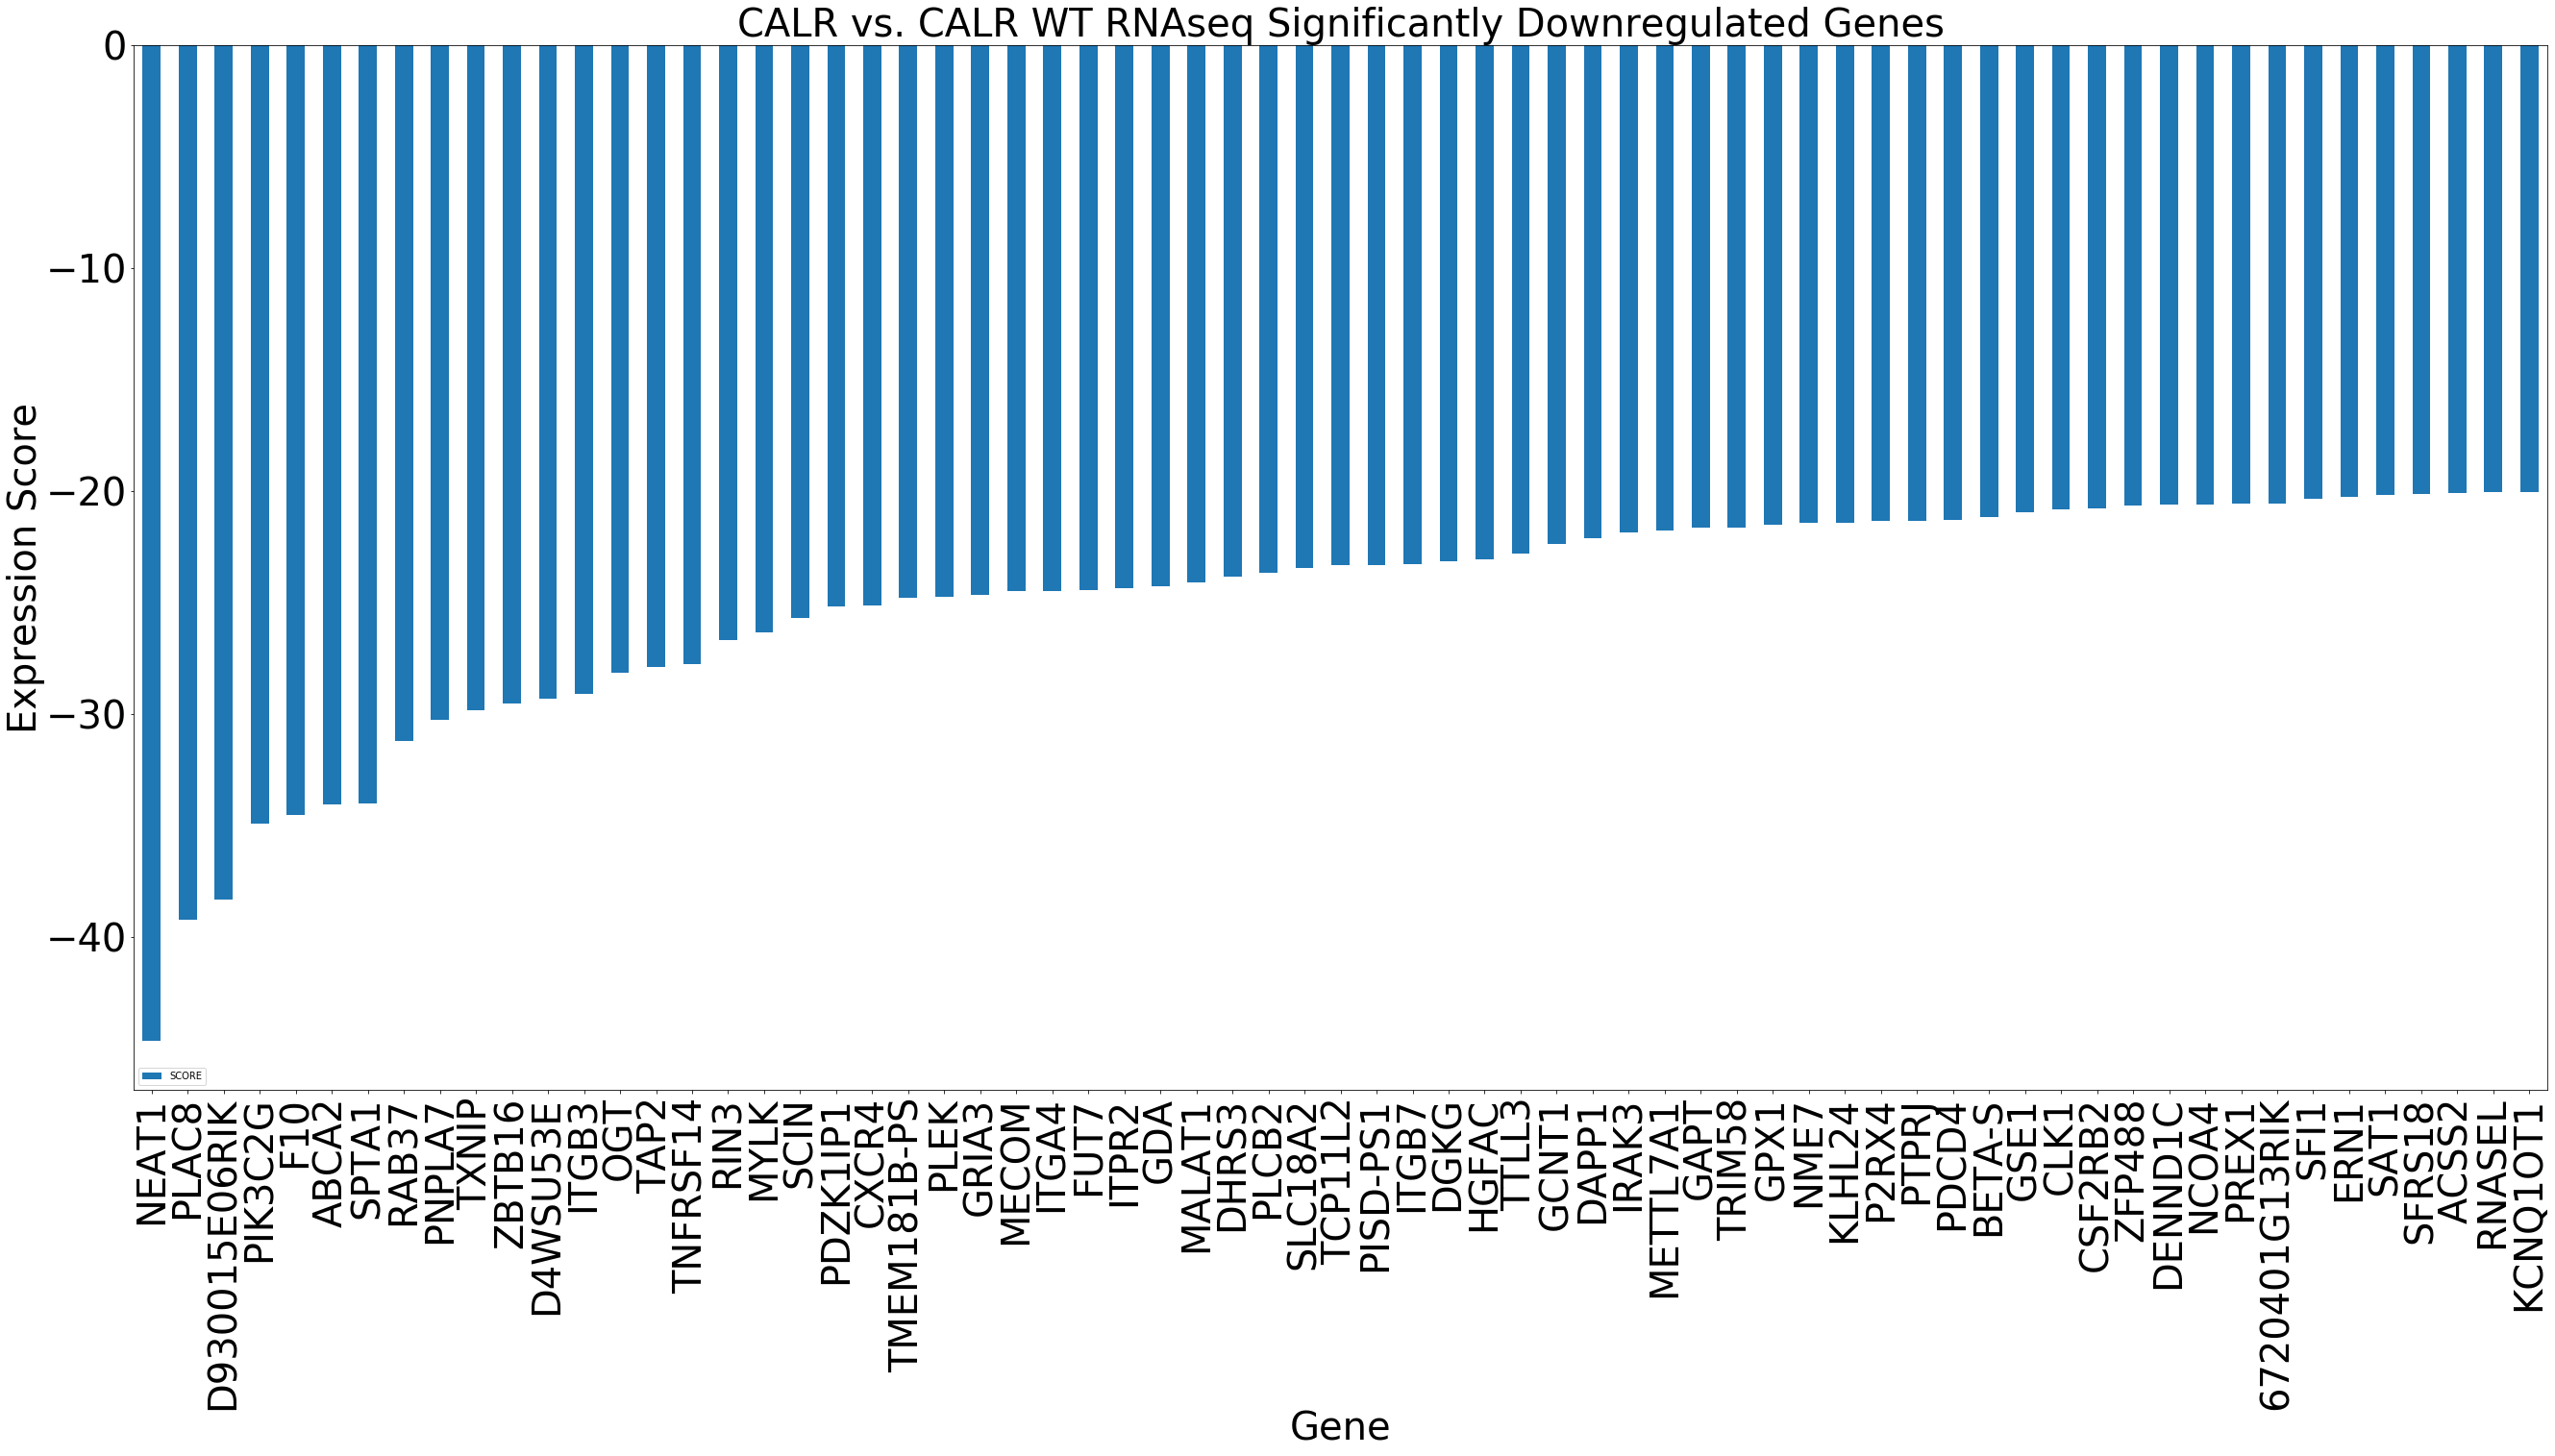

In [58]:
#Graph of significantly downregulated genes
df_downregulated.plot(x='NAME', y='SCORE', kind= 'bar', figsize=(45,20),fontsize =40)
plt.ylabel("Expression Score", labelpad=0.5, fontsize=40)
plt.title("CALR vs. CALR WT RNAseq Significantly Downregulated Genes", y=1, fontsize =40)
plt.xlabel("Gene", labelpad=1, fontsize =40)

In [59]:
#Select UPR associated genes to be matched against significantly down or upregulated RNA seq. genes
#Discriminate columns: only information required from the UPR associated genes data is the gene "symbol"
cols = ['Symbol']
df = xl.parse("UPR")
df

,Symbol
0,ACADVL
1,ADD1
2,ARFGAP1
3,ASNS
4,ATF3
...,...
74,WFS1
75,WIPI1
76,XBP1
77,YIF1A


In [60]:
#Define UPR associated genes as dataframe
df_upr = xl.parse("UPR")
#check/list UPR data frame
print (df_upr)

     Symbol
0    ACADVL
1      ADD1
2   ARFGAP1
3      ASNS
4      ATF3
..      ...
74     WFS1
75    WIPI1
76     XBP1
77    YIF1A
78   ZBTB17

[79 rows x 1 columns]


In [61]:
#Write UPR and RNA seq. upregulated genes in one excel file named UPRUpMatch.xlsx and save
writer = pd.ExcelWriter('UPRUpMatch.xlsx')
df_upr.to_excel(writer,'one', startrow=0 , startcol=0)
df_Upregulated.to_excel(writer,'one', startrow=0, startcol=2)
writer.save()

Text(0, 1.12, 'UPR vs. RNASeq Matching Upregulated Genes')

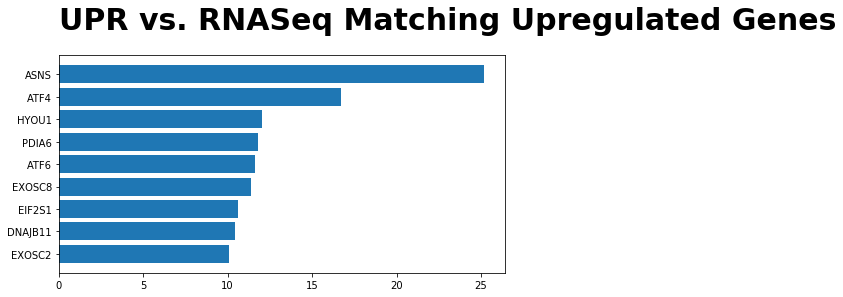

In [62]:
#Graph matched genes (include gene name and expression score) 
df = pd.read_excel('UpGraph.xlsx', usecols =['NAME', 'SCORE'], fontsize= 30)
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df['NAME'], df['SCORE'])
ax.text(0, 1.12, 'UPR vs. RNASeq Matching Upregulated Genes',
            transform=ax.transAxes, size=24, weight=600, ha='left', fontsize= 30)

In [63]:
#Write UPR and RNA seq. downregulated genes in one excel file named UPRDownMatch.xlsx
writer = pd.ExcelWriter('UPRDownMatch.xlsx')
df_upr.to_excel(writer,'one', startrow=0 , startcol=0)
df_downregulated.to_excel(writer,'one', startrow=0, startcol=2)
writer.save()

In [64]:
#Match UPR and downregulated genes based gene name
#Whichever genes are found in both or match UPR and RNA seq. downregulated columns will appear in list below with the corresponding expression score
df = pd.read_excel('UPRDownMatch.xlsx')
df.drop(df.columns[df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
result = df[df['NAME'].isin(list(df['Symbol']))]
result

,Symbol,NAME,SCORE
61,PREB,ERN1,-20.256012


In [65]:
#Import the chart above as output into a separate excel sheet named UPRDownGraph.xlsx
writer = ExcelWriter('UPRDownGraph.xlsx')
result.to_excel(writer,'one',index=False)
writer.save()

Text(0, 1.12, 'UPR vs. RNASeq Matching Downregulated Genes')

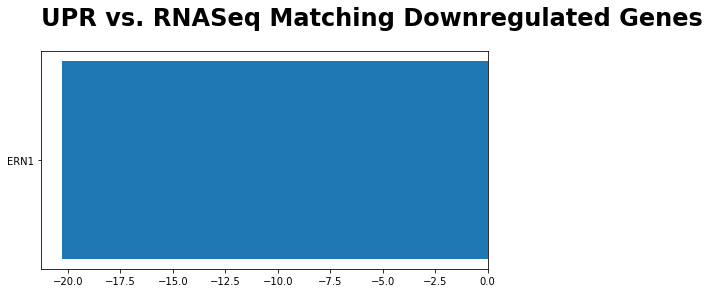

In [66]:
#Generate graph of the matched UPR and downregulated RNA Seq. genes 
#Graph matched genes (include gene name and score)

df = pd.read_excel('UPRDownGraph.xlsx', usecols =['NAME', 'SCORE'])
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df['NAME'], df['SCORE'])
ax.text(0, 1.12, 'UPR vs. RNASeq Matching Downregulated Genes',
            transform=ax.transAxes, size=24, weight=600, ha='left')

In [67]:
#Select Glycolysis (Gly) associated genes to be matched against significantly down or upregulated RNA seq. genes
#Discriminate columns: only information required from the Gly associated genes data is the gene "symbol"
cols = ['Symbol']
df = xl.parse("Gly")
df

,Symbol
0,ABCB1
1,ACLY
2,ACMSD
3,ACP1
4,ADA
...,...
80,TSC1
81,UCA1
82,UCP3
83,VEGFA


In [68]:
#Define Gly associated genes as dataframe
df_Gly = xl.parse("Gly")
#check/list Gly data frame
print (df_Gly)

   Symbol
0   ABCB1
1    ACLY
2   ACMSD
3    ACP1
4     ADA
..    ...
80   TSC1
81   UCA1
82   UCP3
83  VEGFA
84    VHL

[85 rows x 1 columns]


In [69]:
#Write Gly and RNA seq. upregulated genes in one excel file named GlyUpMatch.xlsx

writer = pd.ExcelWriter('GlyUpMatch.xlsx')
df_Gly.to_excel(writer,'Sheet1', startrow=0 , startcol=0)
df_Upregulated.to_excel(writer,'Sheet1', startrow=0, startcol=2)
writer.save()

In [70]:
#Drop non-required colums/data from data imported in the GlyUpMatch.xlsx
#Match Gly and Upregulated genes based gene name
#Whichever genes are found in both or match Gly and RNA seq. upregulated columns will appear in list below with the corresponding expression score

df = pd.read_excel('GlyUpMatch.xlsx')
df.drop(df.columns[df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
result = df[df['NAME'].isin(list(df['Symbol']))]
result

,Symbol,NAME,SCORE
15,CASP1,LDHA,22.457441
18,CRNDE,PKM,22.771986
32,GSK3B,PIM2,30.288067


In [71]:
#Import the above chart of matching genes as output into a seperate excel sheet named GlyUpGraph.xlsx
writer = ExcelWriter('GlyUpGraph.xlsx')
result.to_excel(writer,'Sheet1',index=False)
writer.save()

Text(0, 1.12, 'Gly vs. RNASeq Matching Upregulated Genes')

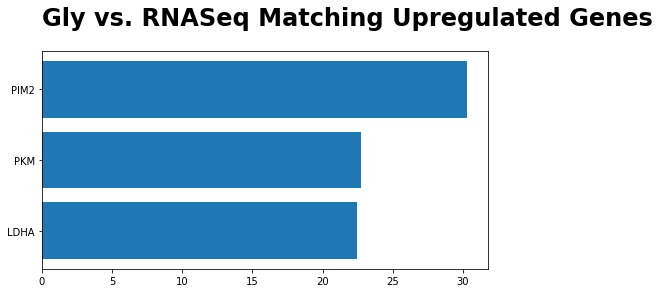

In [72]:
#Graph matched genes (include gene name and score) 
df = pd.read_excel('GlyUpGraph.xlsx', usecols =['NAME', 'SCORE'])
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df['NAME'], df['SCORE'])
ax.text(0, 1.12, 'Gly vs. RNASeq Matching Upregulated Genes',
            transform=ax.transAxes, size=24, weight=600, ha='left')

In [73]:
#Write Gly and RNA seq. downregulated genes in one excel file named GlyDownMatch.xlsx
writer = pd.ExcelWriter('GlyDownMatch.xlsx')
df_Gly.to_excel(writer,'Sheet1', startrow=0 , startcol=0)
df_downregulated.to_excel(writer,'Sheet1', startrow=0, startcol=2)
writer.save()

In [74]:
#Match Gly and downregulated genes based on gene name
#Whichever genes are found in both or match UPR and RNA seq. downregulated columns will appear in list below with the corresponding expression score
df = pd.read_excel('GlyDownMatch.xlsx')
df.drop(df.columns[df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
result = df[df['NAME'].isin(list(df['Symbol']))]
result

,Symbol,NAME,SCORE


In [75]:
#Import the chart above as output into a separate excel sheet named GlyDownGraph.xlsx
writer = ExcelWriter('GlyDownGraph.xlsx')
result.to_excel(writer,'Sheet1',index=False)
writer.save()

Text(0, 1.12, 'Gly vs. RNASeq Matching Downregulated Genes')

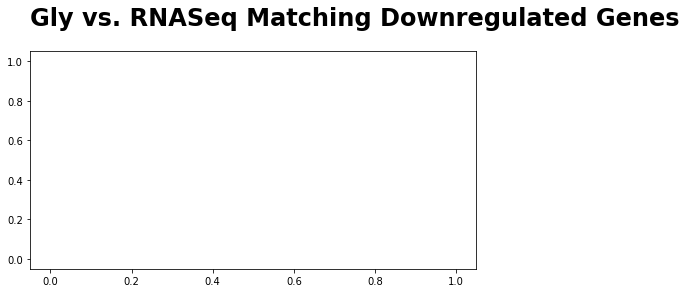

In [76]:
#Generate graph of the matched Gly and downregulated RNA Seq. genes 
#Graph matched genes (include gene name and score)

df = pd.read_excel('GlyDownGraph.xlsx', usecols =['NAME', 'SCORE'])
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df['NAME'], df['SCORE'])
ax.text(0, 1.12, 'Gly vs. RNASeq Matching Downregulated Genes',
            transform=ax.transAxes, size=24, weight=600, ha='left')